
<div class="alert alert-info" style="background-color: 	#800080; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Underfitting-Overfitting</h2>
</div>


### Table of contents : <br/>
1. Problem statement
2. Loading Data
3. Understand the Data
4. Data Preprocessing 
    * Dropping unncessary columns
    * Missing values
    * label encoding
    * Feature Selection
5. Exploratory Data Analysis
    * Heat map
    * Histograms
    * Scatter plot
6. Model Building 
    * Splitting data
    * Linear model 
    * Polynomial model - degree 2
    * Polynomial model - degree 3
    * Finding Ideal degree
7. Final Model and test

<div class="alert alert-info" style="background-color:#800080; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Importing Libraries</h2>
</div>

In [3]:
# Basic libraries required
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics 
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures


<div class="alert alert-info" style="background-color:#800080; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>1. Convert Business Problem to Data Science Problem</h2>
</div>

We have data abour salary of various employees in different companies and at different positions. <br/>
Data includes their base pay along with all other benifits. <br/>
Let's see how will "Overtime pay ,other pay,Benefits" increases with basic pay

<div class="alert alert-info" style="background-color:#800080; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>2. Load Data</h2>
</div>

In [93]:
# reading the data from csv file to dataframe
data = pd.read_csv('salaries.csv')
data.head()

D:\anaconda\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (3,4,5,6,12) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411,0,400184,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966,245132,137811,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739,106088,16452.6,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916,56120.7,198307,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134402,9737,182235,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN


<div class="alert alert-info" style="background-color:#800080; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>3. Understanding Data </h2>
</div>

In [94]:
# info() prints summary of data like dtypes, memory usage
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148654 entries, 0 to 148653
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Id                148654 non-null  int64  
 1   EmployeeName      148654 non-null  object 
 2   JobTitle          148654 non-null  object 
 3   BasePay           148049 non-null  object 
 4   OvertimePay       148654 non-null  object 
 5   OtherPay          148654 non-null  object 
 6   Benefits          112495 non-null  object 
 7   TotalPay          148654 non-null  float64
 8   TotalPayBenefits  148654 non-null  float64
 9   Year              148654 non-null  int64  
 10  Notes             0 non-null       float64
 11  Agency            148654 non-null  object 
 12  Status            38119 non-null   object 
dtypes: float64(3), int64(2), object(8)
memory usage: 14.7+ MB


In [95]:
# To know how many data points,features we have 
data.shape

(148654, 13)

In [96]:
# describe() will tell us about statistical information of each Numerical column
data.describe()

,Id,TotalPay,TotalPayBenefits,Year,Notes
count,148654.000000,148654.000000,148654.000000,148654.000000,0.0
mean,74327.500000,74768.321972,93692.554811,2012.522643,NaN
std,42912.857795,50517.005274,62793.533483,1.117538,NaN
min,1.000000,-618.130000,-618.130000,2011.000000,NaN
25%,37164.250000,36168.995000,44065.650000,2012.000000,NaN
50%,74327.500000,71426.610000,92404.090000,2013.000000,NaN
75%,111490.750000,105839.135000,132876.450000,2014.000000,NaN
max,148654.000000,567595.430000,567595.430000,2014.000000,NaN


<div class="alert alert-info" style="padding:0px 10px; border-radius:5px;"><h3 style='margin:10px 5px'> Inferences:</h3>
</div>

* we can see that we have **13** attributes with **148654** records
* we can observe that *note* attribute doesn't have any information and we can drop it


<div class="alert alert-info" style="background-color:#800080; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>4. Data Pre-processing </h2>
</div>

###  4.1 Dropping unnecessary columns
We know that id,employee name will be unique for everyone and will not carry any weightage to the model.<br/>
So, let's drop them

In [97]:
data.drop(['Id','EmployeeName'],axis=1,inplace=True)

In [98]:
data.head()

,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411,0,400184,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,CAPTAIN III (POLICE DEPARTMENT),155966,245132,137811,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,CAPTAIN III (POLICE DEPARTMENT),212739,106088,16452.6,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916,56120.7,198307,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134402,9737,182235,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN


### 4.2 Dealing with missing values

In [99]:
data.isnull().sum()

JobTitle                 0
BasePay                605
OvertimePay              0
OtherPay                 0
Benefits             36159
TotalPay                 0
TotalPayBenefits         0
Year                     0
Notes               148654
Agency                   0
Status              110535
dtype: int64

#### 'Notes' 
We can see that 'Notes' attribute doesn't have any information. Let's drop it

In [100]:
data.drop(['Notes'],inplace=True,axis=1)
data.head()

,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Agency,Status
0,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411,0,400184,NaN,567595.43,567595.43,2011,San Francisco,NaN
1,CAPTAIN III (POLICE DEPARTMENT),155966,245132,137811,NaN,538909.28,538909.28,2011,San Francisco,NaN
2,CAPTAIN III (POLICE DEPARTMENT),212739,106088,16452.6,NaN,335279.91,335279.91,2011,San Francisco,NaN
3,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916,56120.7,198307,NaN,332343.61,332343.61,2011,San Francisco,NaN
4,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134402,9737,182235,NaN,326373.19,326373.19,2011,San Francisco,NaN


#### 'Status' 

In [101]:
data[data['Status'].isnull()==False]['Status'].value_counts()

FT    22334
PT    15785
Name: Status, dtype: int64

We can observe that we have very less records of Status attribute. It isn't appropriate to imputate the data. <br/>
Therefore let's drop this column too

In [102]:
data.drop(['Status'],axis=1,inplace=True)
data.head()

,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Agency
0,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411,0,400184,NaN,567595.43,567595.43,2011,San Francisco
1,CAPTAIN III (POLICE DEPARTMENT),155966,245132,137811,NaN,538909.28,538909.28,2011,San Francisco
2,CAPTAIN III (POLICE DEPARTMENT),212739,106088,16452.6,NaN,335279.91,335279.91,2011,San Francisco
3,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916,56120.7,198307,NaN,332343.61,332343.61,2011,San Francisco
4,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134402,9737,182235,NaN,326373.19,326373.19,2011,San Francisco


#### 'Benefits' 

We know that benefits is nothing but difference between **"Totalpay Benefits"** and **"Totalpay"** <br/>
Let's replace NaN values will '0'

In [103]:
data['Benefits'].fillna(0,inplace=True)
data.tail()

,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Agency
148649,Custodian,0.00,0.00,0.00,0.00,0.00,0.00,2014,San Francisco
148650,Not provided,Not Provided,Not Provided,Not Provided,Not Provided,0.00,0.00,2014,San Francisco
148651,Not provided,Not Provided,Not Provided,Not Provided,Not Provided,0.00,0.00,2014,San Francisco
148652,Not provided,Not Provided,Not Provided,Not Provided,Not Provided,0.00,0.00,2014,San Francisco
148653,"Counselor, Log Cabin Ranch",0.00,0.00,-618.13,0.00,-618.13,-618.13,2014,San Francisco


#### 'BasePay'
We observe that 605 records are Null.Let's observe them

In [104]:
data[data['BasePay'].isnull()==True]

,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Agency
81391,Deputy Chief 3,NaN,0,149934,0,149934.11,149934.11,2013,San Francisco
84506,Licensed Vocational Nurse,NaN,0,110485,20779,110485.41,131264.41,2013,San Francisco
84960,Park Patrol Officer,NaN,0,120000,8841.48,120000.00,128841.48,2013,San Francisco
90525,Police Officer 3,NaN,0,106079,0,106079.31,106079.31,2013,San Francisco
90786,Deputy Sheriff,NaN,0,81299,23877.5,81299.02,105176.55,2013,San Francisco
...,...,...,...,...,...,...,...,...,...
110526,PS Aide Health Services,NaN,0,10.67,0,10.67,10.67,2013,San Francisco
110527,Senior Clerk,NaN,0,5.56,0,5.56,5.56,2013,San Francisco
110528,Police Officer 3,NaN,0,0,-2.73,0.00,-2.73,2013,San Francisco
110529,Police Officer 3,NaN,0,0,-8.2,0.00,-8.20,2013,San Francisco


we can see that even though data about BasePay isn't provided , that person still gets the TotalPay from other factors.<br/>
So let's make BasePay as 0 here

In [105]:
data['BasePay'].fillna(0,inplace=True)

#### Columns with '"Not Provided" as value

In [106]:
data[data['BasePay']=='Not Provided']

,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Agency
148646,Not provided,Not Provided,Not Provided,Not Provided,Not Provided,0.0,0.0,2014,San Francisco
148650,Not provided,Not Provided,Not Provided,Not Provided,Not Provided,0.0,0.0,2014,San Francisco
148651,Not provided,Not Provided,Not Provided,Not Provided,Not Provided,0.0,0.0,2014,San Francisco
148652,Not provided,Not Provided,Not Provided,Not Provided,Not Provided,0.0,0.0,2014,San Francisco


we see that some of the rows doesn't have required information at all <br/>
So let's just remove them

In [107]:
data = data[data['BasePay'] != 'Not Provided']
data.shape

(148650, 9)

<div class="alert alert-info" style="padding:0px 10px; border-radius:5px;"><h3 style='margin:10px 5px'> Inferences:</h3>
</div>

* We dropped 'Notes','Status' columns
* We changed 'Benefits','BasePay' null values to 0
* We dropped rows with unprovided information

In [108]:
data.head()

,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Agency
0,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411,0,400184,0,567595.43,567595.43,2011,San Francisco
1,CAPTAIN III (POLICE DEPARTMENT),155966,245132,137811,0,538909.28,538909.28,2011,San Francisco
2,CAPTAIN III (POLICE DEPARTMENT),212739,106088,16452.6,0,335279.91,335279.91,2011,San Francisco
3,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916,56120.7,198307,0,332343.61,332343.61,2011,San Francisco
4,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134402,9737,182235,0,326373.19,326373.19,2011,San Francisco


### 4.3 Encoding Categorical Columns - Label Encoding
Let's observe each column

#### 'JobTitle'

In [109]:
data['JobTitle'].value_counts()

Transit Operator                  7036
Special Nurse                     4389
Registered Nurse                  3736
Public Svc Aide-Public Works      2518
Police Officer 3                  2421
                                  ... 
HH Mechanical Shop Sprv              1
ORTHOPEDIC TECHNICIAN I              1
Managing Attorney                    1
SECRETARY, LIBRARY COMMISSION        1
Auto Body&Fender Wrk Asst Sprv       1
Name: JobTitle, Length: 2158, dtype: int64

In [110]:
data['JobTitle'] = data['JobTitle'].astype('category').cat.codes
data.head(2)

,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Agency
0,831,167411,0,400184,0,567595.43,567595.43,2011,San Francisco
1,293,155966,245132,137811,0,538909.28,538909.28,2011,San Francisco


#### "Agency"

In [111]:
data['Agency'].value_counts()

San Francisco    148650
Name: Agency, dtype: int64

Agency doesn't carry any weightage as all values are same <br/>
Let's drop the column

In [112]:
data.drop(['Agency'],axis=1,inplace=True)

### 4.4 Changing dtype

In [113]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 148650 entries, 0 to 148653
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   JobTitle          148650 non-null  int16  
 1   BasePay           148650 non-null  object 
 2   OvertimePay       148650 non-null  object 
 3   OtherPay          148650 non-null  object 
 4   Benefits          148650 non-null  object 
 5   TotalPay          148650 non-null  float64
 6   TotalPayBenefits  148650 non-null  float64
 7   Year              148650 non-null  int64  
dtypes: float64(2), int16(1), int64(1), object(4)
memory usage: 9.4+ MB


we see 'Basepay','Overtimepay','Otherpay','Benifits' are Object DType <br/>
Let's change it to float

In [114]:
data = data.astype('float64')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 148650 entries, 0 to 148653
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   JobTitle          148650 non-null  float64
 1   BasePay           148650 non-null  float64
 2   OvertimePay       148650 non-null  float64
 3   OtherPay          148650 non-null  float64
 4   Benefits          148650 non-null  float64
 5   TotalPay          148650 non-null  float64
 6   TotalPayBenefits  148650 non-null  float64
 7   Year              148650 non-null  float64
dtypes: float64(8)
memory usage: 10.2 MB


### 4.5 Feature Selection
According to the problem statement, we have to join 'Overtime Pay; ,'other pay' ,Benefits' <br/>

In [115]:
data['Response'] = data['OvertimePay'] + data['OtherPay'] + data['Benefits']

In [116]:
data['Regressor'] = data['BasePay']

Let's drop unnecessary columns

In [117]:
data.drop(['JobTitle','TotalPay','TotalPayBenefits','BasePay','OvertimePay','OtherPay','Benefits'],axis=1,inplace=True)

It was asked to test on 2014 data.Let's seperate it for test purpose

In [119]:
test = data[data['Year']==2014]
data = data[data['Year'] != 2014]

In [124]:
test.shape

(38119, 3)

### Final data after preprocessing

In [120]:
data.head()

,Year,Response,Regressor
0,2011.0,400184.25,167411.18
1,2011.0,382943.26,155966.02
2,2011.0,122540.78,212739.13
3,2011.0,254427.61,77916.00
4,2011.0,191971.59,134401.60



<div class="alert alert-info" style="background-color:#800080; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>5. Exploratory Data Analysis </h2>
</div>

### 5.1 HeatMap

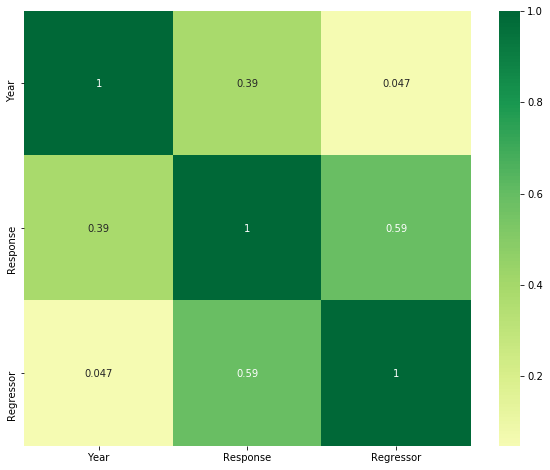

In [125]:
# To know correlation between attributes
plt.figure(figsize = (10,8))
p=sns.heatmap(data.corr(), annot=True,cmap='RdYlGn',center=0) 

### 5.2 Histograms

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001C55F52A448>,
      dtype=object)

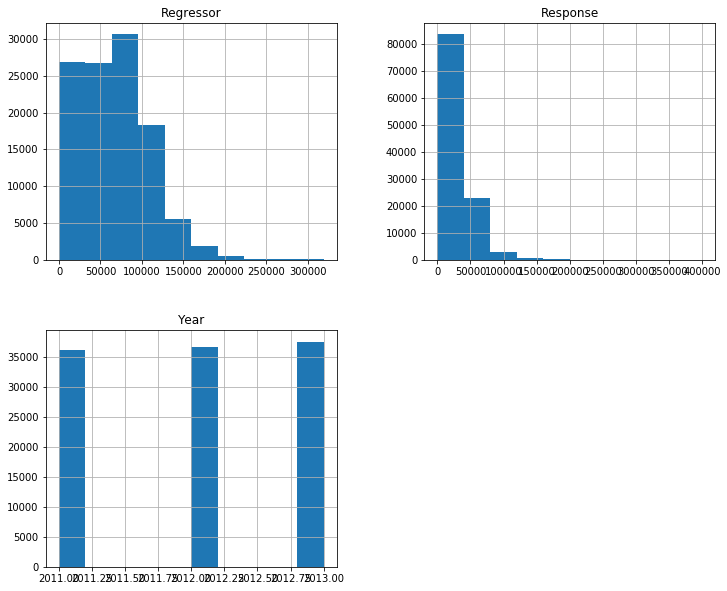

In [126]:
data.hist(figsize=(12,10))

### 5.3 Scatter Plot

Text(0, 0.5, 'salary')

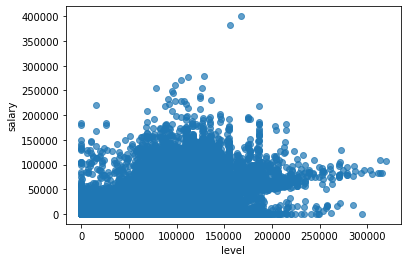

In [130]:
plt.scatter(data['Regressor'],data['Response'],alpha=0.7)
plt.xlabel('level')
plt.ylabel('salary')

we have to create a model for this plot such that our model fits into this data


<div class="alert alert-info" style="background-color:#800080; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>6. Model Building </h2>
</div>

<div class="alert alert-info" style="background-color:#800080; color:white; padding:0px 10px; border-radius:5px;"><h3 style='margin:10px 5px'>6.1 Splitting the data </h3>
 </div>

In [167]:
# splitting the data into 2 parts,one to train the model and another one to test the trained model

# splitting the data such that 80% is used for training and remaining 20% for testing
X_train, X_val, y_train, y_val = train_test_split(data[['Regressor']], data[['Response']], test_size=0.2)

We will make a basic linear regression model and let's see how our model fit into the data

<div class="alert alert-info" style="background-color:#800080; color:white; padding:0px 10px; border-radius:5px;"><h3 style='margin:10px 5px'>6.2 Simple Linear regression Analysis</h3></div>

In [206]:
# initializing model
model = LinearRegression()

# fitting data
model.fit(X_train,y_train)

# predict 
pred_train = model.predict(X_train)
pred_val = model.predict(X_val)

# r2
train_R2_LR = r2_score(y_train,pred_train)
test_R2_LR = r2_score(y_val,pred_val)

print('train R2:',train_R2_LR)
print('test R2:',test_R2_LR)

train R2: 0.35135271902765974
test R2: 0.35077212082526643


Text(0.5, 1.0, 'Linear Regression for level and salary')

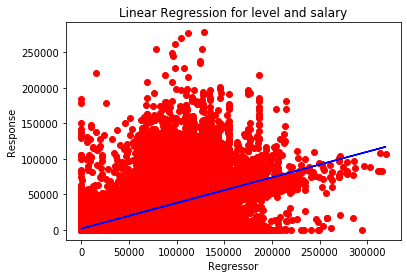

In [207]:
# let's see how well our model fit into data 
# training data plot
plt.scatter(X_train,y_train, color="red")
plt.plot(X_train, pred_train, color="blue")
plt.xlabel("Regressor")
plt.ylabel("Response")
plt.title("Linear Regression for level and salary")

Text(0.5, 1.0, 'Linear Regression for level and salary')

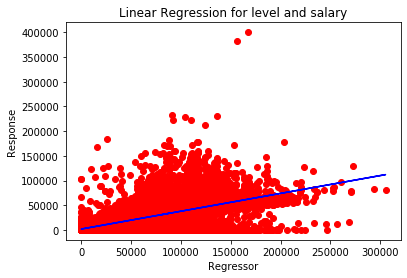

In [208]:
# validation data plot
plt.scatter(X_val,y_val, color="red")
plt.plot(X_val, pred_val, color="blue")
plt.xlabel("Regressor")
plt.ylabel("Response")
plt.title("Linear Regression for level and salary")

Red coloured data is actual data and blue line is our model <br/>

Let's see other case where we will try to fit our data into a polynomial model wih degree 2 and 3

<div class="alert alert-info" style="background-color:#800080; color:white; padding:0px 10px; border-radius:5px;"><h3 style='margin:10px 5px'>6.3 Simple non-linear regression analysis with degree 2.
</h3></div>

In [209]:
## let's transform data into polynomial form with degree=10
poly_reg=PolynomialFeatures(degree=2)
x_poly=poly_reg.fit_transform(X_train)

poly_reg.fit(x_poly,y_train)

# fitting our data into model
model=LinearRegression()
model.fit(x_poly,y_train)

#predictions
pred_train = model.predict(x_poly)
x_poly_val = poly_reg.fit_transform(X_val)
pred_val = model.predict(x_poly_val)

# r2
train_R2_PR2 = r2_score(y_train,pred_train)
test_R2_PR2 = r2_score(y_val,pred_val)

print('train R2:',train_R2_PR2)
print('test R2:',test_R2_PR2)

train R2: 0.3603237668704662
test R2: 0.3607917447974589


Text(0.5, 1.0, 'Linear Regression for level and salary')

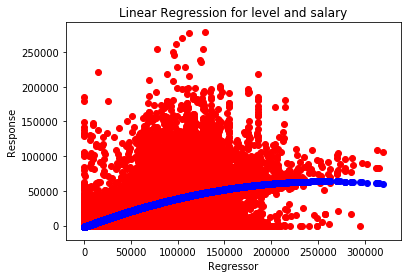

In [219]:
# let's see how well our model fit into data 
# training data plot
plt.scatter(X_train,y_train, color="red")
plt.scatter(X_train, pred_train, color="blue")
plt.xlabel("Regressor")
plt.ylabel("Response")
plt.title("Linear Regression for level and salary")

Text(0.5, 1.0, 'Linear Regression for level and salary')

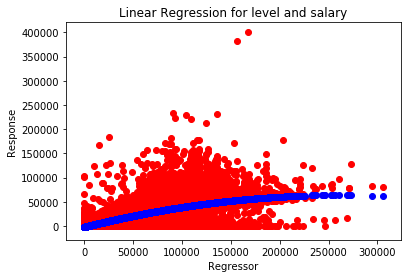

In [220]:
# validation data plot
plt.scatter(X_val,y_val, color="red")
plt.scatter(X_val, pred_val, color="blue")
plt.xlabel("Regressor")
plt.ylabel("Response")
plt.title("Linear Regression for level and salary")

Red coloured data is actual data and blue line is our model <br/>

<div class="alert alert-info" style="background-color:#800080; color:white; padding:0px 10px; border-radius:5px;"><h3 style='margin:10px 5px'>6.4 Simple non-linear regression analysis with degree 3.
</h3></div>

In [174]:
## let's transform data into polynomial form with degree=10
poly_reg=PolynomialFeatures(degree=3)
x_poly=poly_reg.fit_transform(X_train)

# fitting our data into model
model=LinearRegression()
model.fit(x_poly,y_train)

#predictions
pred_train = model.predict(x_poly)
x_poly_val = poly_reg.fit_transform(X_val)
pred_val = model.predict(x_poly_val)

# r2
train_R2_PR3 = r2_score(y_train,pred_train)
test_R2_PR3 = r2_score(y_val,pred_val)

print('train R2:',train_R2_PR3)
print('test R2:',test_R2_PR3)

train R2: 0.360770377215356
test R2: 0.3613096025292625


Text(0.5, 1.0, 'Linear Regression for level and salary')

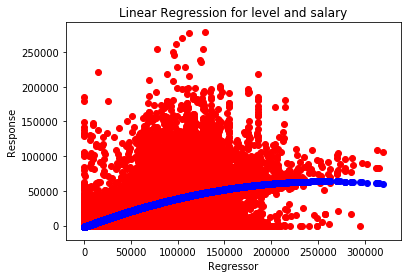

In [221]:
# let's see how well our model fit into data 
# training data plot
plt.scatter(X_train,y_train, color="red")
plt.scatter(X_train, pred_train, color="blue")
plt.xlabel("Regressor")
plt.ylabel("Response")
plt.title("Linear Regression for level and salary")

Text(0.5, 1.0, 'Linear Regression for level and salary')

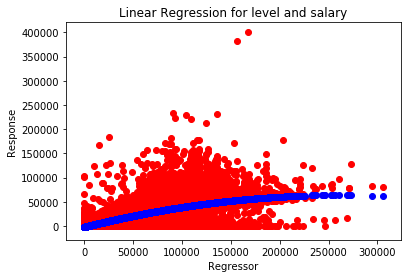

In [222]:
# validation data plot
plt.scatter(X_val,y_val, color="red")
plt.scatter(X_val, pred_val, color="blue")
plt.xlabel("Regressor")
plt.ylabel("Response")
plt.title("Linear Regression for level and salary")

<div class="alert alert-info" style="background-color:#800080; color:white; padding:0px 10px; border-radius:5px;"><h3 style='margin:10px 5px'>6.4 Finding ideal degree </h3></div>

We know that if R2 score is more , the model is perfect <br/>
We have seen R2 for linear model , polynomial with degree 2 and 3 out of which polynomial with degree=3 yields the best results<br/>
Let's see some more polynomial degrees and see which will have high R2 score

In [177]:
# let's define lists to score errors and k-values
train_R2 = []
test_R2 = []
degree = []

# k ranging from 1-10
for k in range(1, 10):
    # storing degree
    degree.append(k)
    
    # initialising model
    poly_reg=PolynomialFeatures(degree=k)
    x_poly=poly_reg.fit_transform(X_train)

    # fitting our data into model
    model=LinearRegression()
    model.fit(x_poly,y_train)
    
    #predictions
    pred_train = model.predict(x_poly)
    x_poly_val = poly_reg.fit_transform(X_val)
    pred_val = model.predict(x_poly_val)

    # training data R2
    train_R2.append(r2_score(y_train,pred_train))
    
    #test data R2
    test_R2.append(r2_score(y_val,pred_val))

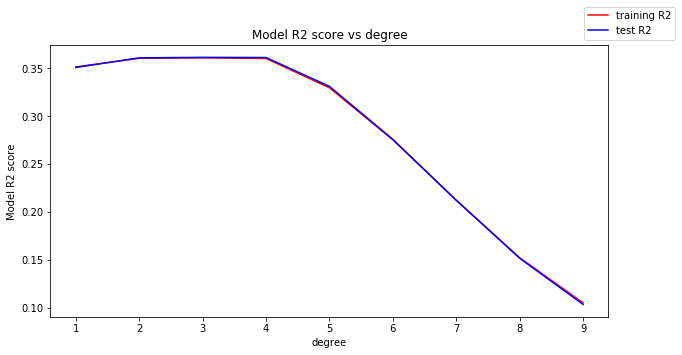

In [178]:
# let's plot training scores , test scores against k values 

plt.figure(figsize=(10,5))
plt.title('Model R2 score vs degree')
plt.xlabel('degree')
plt.ylabel('Model R2 score')
plt.plot(degree, train_R2, color = 'r', label = "training R2")
plt.plot(degree, test_R2, color = 'b', label = 'test R2')
plt.legend(bbox_to_anchor=(1, 1),bbox_transform=plt.gcf().transFigure)

<div class="alert alert-info" style="padding:0px 10px; border-radius:5px;"><h3 style='margin:10px 5px'> Inferences:</h3>
</div>

We see that Polynomial model with degree= 3 gives best R2 score 

<div class="alert alert-info" style="background-color:#800080; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>6.5 Final Model and Test </h2>
 </div>

let's make a model with degree of 3 

In [181]:
## let's transform data into polynomial form with degree=10
poly_reg=PolynomialFeatures(degree=3)
x_poly=poly_reg.fit_transform(X_train)

# fitting our data into model
model=LinearRegression()
model.fit(x_poly,y_train)

#predictions
pred_train = model.predict(x_poly)
x_poly_val = poly_reg.fit_transform(X_val)
pred_val = model.predict(x_poly_val)

# r2
train_R2_PR3 = r2_score(y_train,pred_train)
test_R2_PR3 = r2_score(y_val,pred_val)

print('train R2:',train_R2_PR3)
print('test R2:',test_R2_PR3)

train R2: 0.360770377215356
test R2: 0.3613096025292625


## Test

In [182]:
x_poly_test =poly_reg.fit_transform(test[['Regressor']])
y_test = model.predict(x_poly_test)

Text(0.5, 1.0, 'simple non linear regression analysis with degree-3')

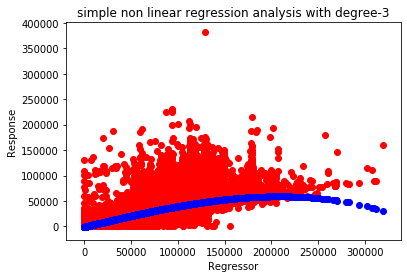

In [218]:
# test data plot
plt.scatter(test[['Regressor']],test[['Response']], color="red")
plt.scatter(test[['Regressor']], y_test, color="blue")
plt.xlabel("Regressor")
plt.ylabel("Response")
plt.title("simple non linear regression analysis with degree-3")

## Thankyou